In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


%matplotlib inline

## Thông tin dữ liệu

The widely used Statlog German credit data ([Web Link]), as of November 2019, suffers from severe errors in the coding information and does not come with any background information. The 'South German Credit' data provide a correction and some background information, based on the Open Data LMU (2010) representation of the same data and several other German language resources.

Source:
- Ulrike Grömping
- Beuth University of Applied Sciences Berlin
- Website with contact information: https://prof.beuth-hochschule.de/groemping/

## Thông tin thuộc tính

This section contains a brief description for each attribute. Details on attribute coding can be obtained from the accompanying R code for reading the data or the accompanying code table, as well as from Groemping (2019) (listed under 'Relevant Papers').

1) Column name: laufkont
- Variable name: status
- Content: status of the debtor's checking account with the bank (categorical); 1 = no checking account ; 2 = … < 0 DM; 3 = 0 <= … < 200 DM; 4 : … >= 200 DM / salary for at least 1 year

2) Column name: laufzeit
- Variable name: duration
- Content: credit duration in months (quantitative); 

3) Column name: moral
- Variable name: credit_history
- Content: history of compliance with previous or concurrent credit contracts (categorical); (0: delay in paying off in the past, 1: critical account/other credits elsewhere, 2: no credits taken/all credits paid back duly, 3: existing credits paid back duly till now; 4: all credits at this bank paid back duly)

4) Column name: verw
- Variable name: purpose
- Content: purpose for which the credit is needed (categorical); (0: others, 1: car (new), 2: car (used), 3: furniture/equipment, 4: radio/television, 5: domestic appliances, 6: repairs, 7: education, 8: vacation, 9: retraining, 10: business)

5) Column name: hoehe
- Variable name: amount
- Content: credit amount in DM (quantitative; result of monotonic transformation; actual data and type of
transformation unknown)

6) Column name: sparkont
- Variable name: savings
- Content: debtor's savings (categorical); (1: unknown/no savings account, 2: … < 100 DM, 3: 100 <= … < 500 DM, 4: 500 <= … < 1000 DM, 5: … >= 1000 DM)

7) Column name: beszeit
- Variable name: employment_duration
- Content: duration of debtor's employment with current employer (ordinal; discretized quantitative); (1: unemployed, 2: < 1 yr, 3: 1 <= … < 4 yrs, 4: 4 <= … < 7 yrs, 5: >= 7 yrs )

8) Column name: rate
- Variable name: installment_rate
- Content: credit installments as a percentage of debtor's disposable income (ordinal; discretized quantitative); (1: >= 35, 2: 25 <= … < 35, 3: 20 <= … < 25, 4: < 20)

9) Column name: famges
- Variable name: personal_status_sex
- Content: combined information on sex and marital status; categorical; sex cannot be recovered from the
variable, because male singles and female non-singles are coded with the same code (2); female widows cannot
be easily classified, because the code table does not list them in any of the female categories; (1:male: divorced/separated, 2:female:non-single or male:single, 3:male:married/widowed, 4:female:single)

10) Column name: buerge
- Variable name: other_debtors
- Content: Is there another debtor or a guarantor for the credit? (categorical); (1: none, 2: co-applicant, 3: guarantor )

11) Column name: wohnzeit
- Variable name: present_residence
- Content: length of time (in years) the debtor lives in the present residence (ordinal; discretized quantitative); (1: < 1 yr ,2: 1 <= … < 4 yrs, 3: 4 <= … < 7 yrs, 4: >= 7 yrs)

12) Column name: verm
- Variable name: property
- ontent: the debtor's most valuable property, i.e. the highest possible code is used. Code 2 is used, if codes 3
or 4 are not applicable and there is a car or any other relevant property that does not fall under variable
sparkont. (ordinal); (1: unknown / no property, 2: car or other, 3: building soc. savings agr./life insurance, 4: real estate )

13) Column name: alter
- Variable name: age
- Content: age in years (quantitative); 

14) Column name: weitkred
- Variable name: other_installment_plans
- Content: installment plans from providers other than the credit-giving bank (categorical); (1: bank, 2: stores, 3: none )

15) Column name: wohn
- Variable name: housing
- Content: type of housing the debtor lives in (categorical); (1: for free, 2: rent, 3: own )

16) Column name: bishkred
- Variable name: number_credits
- Content: number of credits including the current one the debtor has (or had) at this bank (ordinal, discretized
quantitative); contrary to Fahrmeir and HamerleÃ¢â‚¬â„¢s (1984) statement, the original data values are not available.; (1: 1, 2: 2-3, 3: 4-5, 4: >= 6)

17) Column name: beruf
- Variable name: job
- Content: quality of debtor's job (ordinal); (1: unemployed/unskilled - non-resident; 2: unskilled - resident; 3: skilled employee/official; 4: manager/self-empl./highly qualif. employee)

18) Column name: pers
- Variable name: people_liable
- Content: number of persons who financially depend on the debtor (i.e., are entitled to maintenance) (binary,
discretized quantitative); (1: 3 or more, 2: 0 to 2 )

19) Column name: telef
- Variable name: telephone
- Content: Is there a telephone landline registered on the debtor's name? (binary; remember that the data are
from the 1970s); (1: no, 2: yes (under customer name))

20) Column name: gastarb
- Variable name: foreign_worker
- Content: Is the debtor a foreign worker? (binary); (1: yes, 2: no)

21) Column name: kredit
- Variable name: credit_risk
- Content: Has the credit contract been complied with (good) or not (bad) ? (binary) 

## Khám phá dữ liệu

### Đọc dữ liệu từ file

In [29]:
# YOUR CODE HERE 
df = pd.read_csv('./data/SouthGermanCredit.asc', sep=' ')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [30]:
# YOUR CODE HERE
shape = df.shape

In [31]:
# TEST
assert shape == (1000, 21)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

### Dữ liệu có các dòng bị lặp không?

In [32]:
# YOUR CODE HERE
num_duplicated_rows = df.duplicated().sum()

In [33]:
# TEST
assert num_duplicated_rows == 0

### Mỗi cột có ý nghĩa gì?

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [34]:
# YOUR CODE HERE
dtypes = df.dtypes

In [35]:
# TEST
int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert int_cols == {'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'}

In [36]:
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


### Với mỗi cột có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

In [37]:
# YOUR CODE HERE
num_col_info_df = df[['laufzeit', 'hoehe', 'beszeit','rate', 'wohnzeit','alter', 'bishkred', 'pers']]
def missing_ratio(x):
    return x.isnull().sum() / len(x)
def lower_quartile(x):
    return x.quantile(0.25)
def upper_quartile(x):
    return x.quantile(0.75)
def median(x):
    return x.median()

In [38]:
num_col_info_df = num_col_info_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])

In [39]:
num_col_info_df

,laufzeit,hoehe,beszeit,rate,wohnzeit,alter,bishkred,pers
missing_ratio,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
min,4.0,250.00,1.0,1.0,1.0,19.0,1.0,1.0
lower_quartile,12.0,1365.50,3.0,2.0,2.0,27.0,1.0,2.0
median,18.0,2319.50,3.0,3.0,3.0,33.0,1.0,2.0
upper_quartile,24.0,3972.25,5.0,4.0,4.0,42.0,2.0,2.0
max,72.0,18424.00,5.0,4.0,4.0,75.0,4.0,2.0


### Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

## Tiền xử lý

In [40]:
## Chỉnh sửa tên cột cho dễ hiểu
rename_lst = ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

df.columns = rename_lst

In [41]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


### Dữ liệu có cân bằng hay không?

Câu hỏi 1: Hãy trực quan hóa với trường dữ liệu `credit_risk` và khi gom nhóm với trường `foreign_worker`, sau đó cho nhận xét dữ liệu có bị mất cân bằng hay không?

In [42]:
df.groupby('foreign_worker')[["credit_risk"]].count()

,credit_risk
foreign_worker,
1,37
2,963


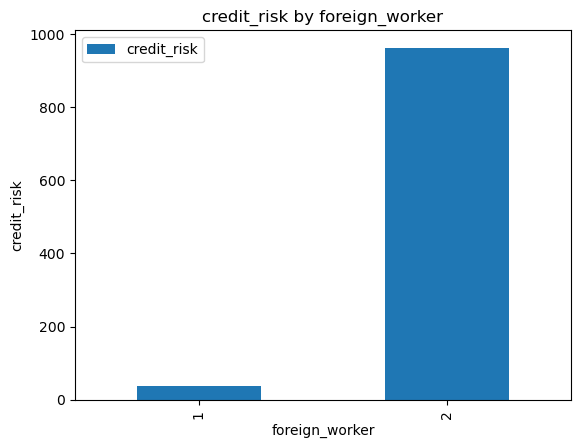

In [43]:
# YOUR CODE HERE
df.groupby('foreign_worker')[["credit_risk"]].count().plot(kind='bar', xlabel='foreign_worker', ylabel='credit_risk', title='credit_risk by foreign_worker')
plt.show()

YOUR ANSWER HERE
### Dự trên trực quan hóa dữ liệu của trường dữ liệu create_risk và khi gom nhóm trường foreign_work thì ta thấy dữ liệu bị mất cân bằng vì số lượng dữ liệu của nhóm 1 (good) lớn hơn nhóm 2 (bad) nhiều. Để giải quyết vấn đề này ta có thể sử dụng phương pháp undersampling hoặc oversampling. Ở đây ta sẽ sử dụng phương pháp undersampling. Để thực hiện phương pháp này ta sẽ sử dụng hàm `sample` để lấy ngẫu nhiên một số lượng dữ liệu của nhóm 1 (good) bằng với số lượng dữ liệu của nhóm 2 (bad) và sau đó gộp hai nhóm lại với nhau. 

Câu 2: Tính toán và trực quan hóa mối tương quan giữa các yếu tố ảnh hưởng đến nhãn `credit_risk` thông qua heatmap.

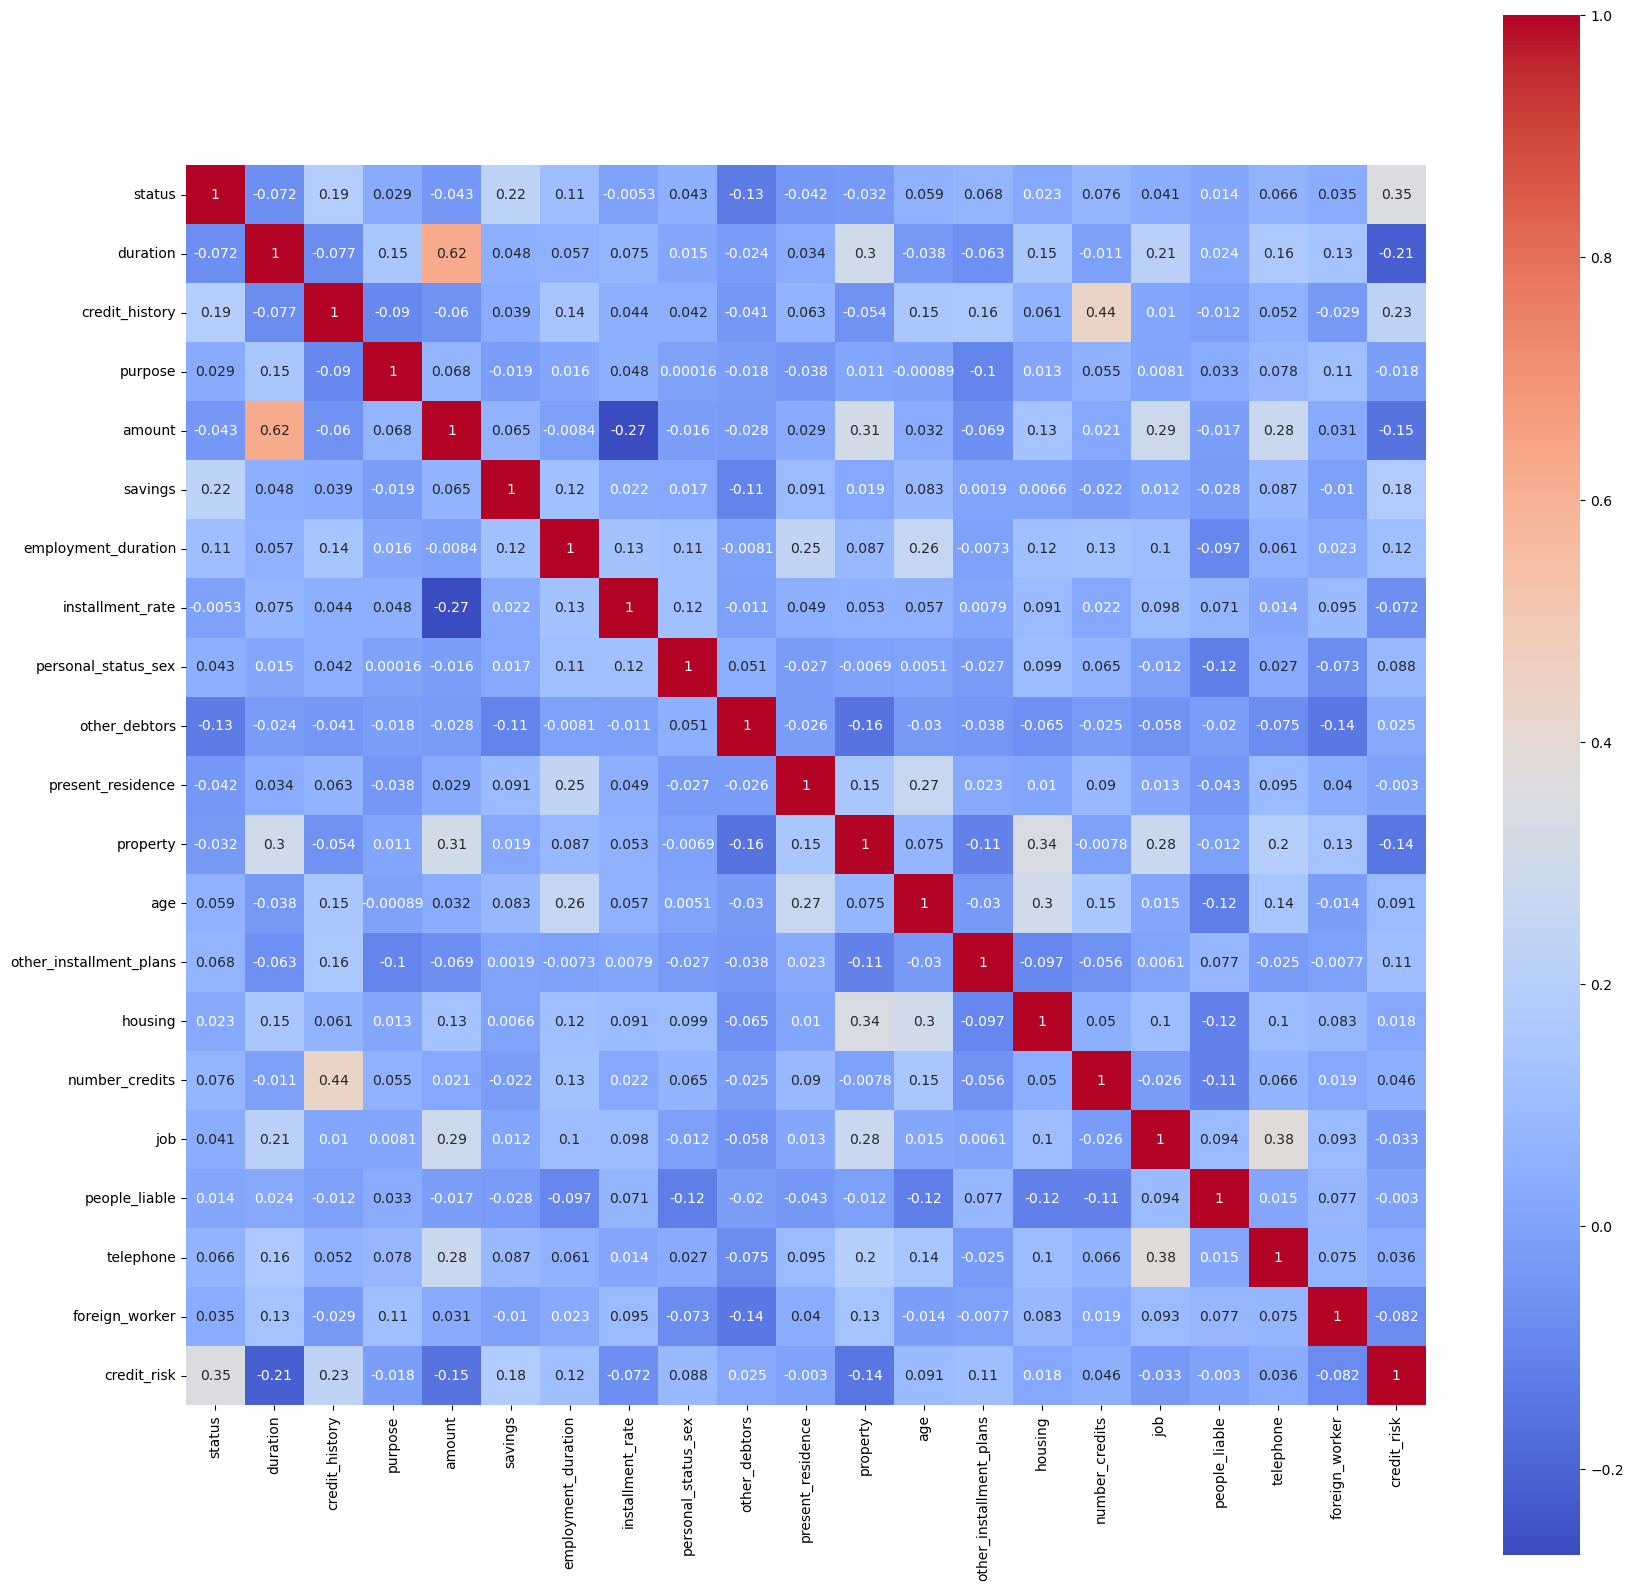

In [44]:
# YOUR CODE HERE
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm')
plt.show()

**Câu 3**: Sử dụng mô hình để tính toán ra những đặc trưng quan trọng? Gợi ý: Coefficients as Feature Importance; Decision Tree Feature Importance; và Permutation Feature Importance.

In [45]:
# YOUR CODE HERE
corr = df.corr()
corr.sort_values(["credit_risk"], ascending = False, inplace = True)
corr.credit_risk.head(6)

credit_risk                1.000000
status                     0.350847
credit_history             0.228785
savings                    0.178943
employment_duration        0.116002
other_installment_plans    0.109844
Name: credit_risk, dtype: float64

**Câu 4**: Trực quan histogram credit risk và rút ra nhận xét.

(array([ 48., 101., 125.,  92.,  71.,  51.,  61.,  21.,  20.,  13.,  16.,
         15.,  11.,  13.,  10.,   5.,   5.,   5.,   1.,   5.,   3.,   0.,
          3.,   0.,   1.,   1.,   1.,   0.,   0.,   2.]),
 array([  250.        ,   770.23333333,  1290.46666667,  1810.7       ,
         2330.93333333,  2851.16666667,  3371.4       ,  3891.63333333,
         4411.86666667,  4932.1       ,  5452.33333333,  5972.56666667,
         6492.8       ,  7013.03333333,  7533.26666667,  8053.5       ,
         8573.73333333,  9093.96666667,  9614.2       , 10134.43333333,
        10654.66666667, 11174.9       , 11695.13333333, 12215.36666667,
        12735.6       , 13255.83333333, 13776.06666667, 14296.3       ,
        14816.53333333, 15336.76666667, 15857.        ]),
 <BarContainer object of 30 artists>)

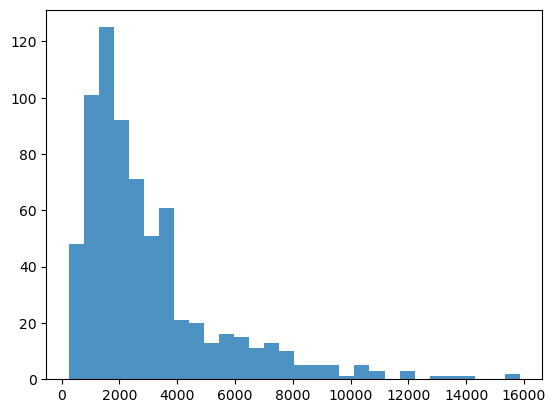

In [46]:
# YOUR CODE HERE
plt.hist(df[df.credit_risk == 1].amount, bins=30, alpha=0.8, label='credit_risk=1')

YOUR ANSWER HERE
#### Từ câu 4 sau khi trực quan histogram credit risk ta thấy đa số các credit có amount 1500-3500 và các credit có amount lớn ( > 10000) có tần suất xuất hiện thấp. Điều này cho thấy rằng đa số các credit có amount nhỏ và có tần suất xuất hiện cao.

## Tiền xử lý dữ liệu

Ta nhận thấy: age, amount và duration có giá trị tương đối lớn so với phần còn lại. Ta sẽ tiền xử lý những đặc trưng này thông qua logarithm transformation.

In [47]:
cp_df = df.copy()

In [48]:
# YOUR CODE HERE
def log_transform(x):
    return np.log(x)
transformer = FunctionTransformer(log_transform, validate=True)
pipe = Pipeline([('transformer', transformer)])
cp_df[['amount', 'age', 'duration']] = pipe.fit_transform(cp_df[['amount', 'age', 'duration']])

In [49]:
# TEST
cp_df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,2.890372,4,2,6.955593,1,2,4,2,1,...,2,3.044522,3,1,1,3,2,1,2,1
1,1,2.197225,4,0,7.937017,1,3,2,3,1,...,1,3.583519,3,1,2,3,1,1,2,1
2,2,2.484907,2,9,6.734592,2,4,2,2,1,...,1,3.135494,3,1,1,2,2,1,2,1
3,1,2.484907,4,0,7.660114,1,3,3,3,1,...,1,3.663562,3,1,2,2,1,1,1,1
4,1,2.484907,4,0,7.682943,1,3,4,3,1,...,2,3.637586,1,2,2,2,2,1,1,1


## Phân chia tập train và tập test

Các bạn thực hiện việc phân chia tập train, tập test cho việc huấn luyện mô hình. Kích thước tập test là 30%, random state tùy thích.

In [50]:
# YOUR CODE HERE
X = df.drop('credit_risk', axis=1)
Y = df['credit_risk']

X_train, X_test, y_train, y_test = train_test_split(cp_df, cp_df.credit_risk, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [51]:
# TEST
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((630, 21), (300, 21), (630,), (300,))

## Mô hình phân lớp

Các mô hình phân lớp tuyến tính
- sklearn.linear_model.LogisticRegression
- sklearn.linear_model.SGDClassifier

Các mô hình phân lớp ensemble
- sklearn.ensemble.RandomForestClassifier
- sklearn.ensemble.GradientBoostingClassifier
- sklearn.ensemble.AdaBoostClassifier
- sklearn.ensemble.BaggingClassifier

Các mô hình dựa trên cây
- sklearn.tree.DecisionTreeClassifier

Các mô hình khác.
- Support Vector Machine: sklearn.svm
- K-Nearest Neighbors: sklearn.neighbors.KNeighborsClassifier
- Naive Bayes: sklearn.naive_bayes.GaussianNB
- Linear Discriminant Analysis: sklearn.discriminant_analysis.LinearDiscriminantAnalysis

Chọn 5 trong số các mô hình sau. Sử dụng RepeatedStratifiedKFold đánh giá trên tập train. Sau đó dùng Random search hoặc Grid search để tìm best hyperparameter và đánh giá trên tập test với các siêu tham số tốt nhất vừa tìm được.

In [52]:
# YOUR CODE HERE
# train model with LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# train model with SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

# train model with GradientBoostingClassifier
gbc = SVC()
gbc.fit(X_train, y_train)

# train model with AdaBoostClassifier
abc = KNeighborsClassifier()
abc.fit(X_train, y_train)

# train model with DecisionTreeClassifier
dtc = GaussianNB()
dtc.fit(X_train, y_train)

# use repeated stratified k-fold cross-validation to evaluate the model
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
lr_scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
sgd_scores = cross_val_score(sgd, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
gbc_scores = cross_val_score(gbc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
abc_scores = cross_val_score(abc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
dtc_scores = cross_val_score(dtc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# summarize performance
print('LogisticRegression: %.3f (%.3f)' % (np.mean(lr_scores), np.std(lr_scores)))
print('SGDClassifier: %.3f (%.3f)' % (np.mean(sgd_scores), np.std(sgd_scores)))
print('GradientBoostingClassifier: %.3f (%.3f)' % (np.mean(gbc_scores), np.std(gbc_scores)))
print('AdaBoostClassifier: %.3f (%.3f)' % (np.mean(abc_scores), np.std(abc_scores)))
print('DecisionTreeClassifier: %.3f (%.3f)' % (np.mean(dtc_scores), np.std(dtc_scores)))

/home/tiendat57/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/tiendat57/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

LogisticRegression: 1.000 (0.000)
SGDClassifier: 0.997 (0.008)
GradientBoostingClassifier: 0.998 (0.007)
AdaBoostClassifier: 0.814 (0.042)
DecisionTreeClassifier: 1.000 (0.000)


    self._make_module_from_path(filepath)
  File "/home/tiendat57/anaconda3/envs/DataScience/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/tiendat57/anaconda3/envs/DataScience/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/tiendat57/anaconda3/envs/DataScience/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1d0c741f70>
Traceback (most recent call last):
  File "/home/tiendat57/anaconda3/envs/DataScience/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File

## Xử lý mất cân bằng dữ liệu và xây dựng mô hình phân lớp

Bằng cách sử dụng thư viện [imblearn](https://imbalanced-learn.org/stable/) để xử lý mất cân bằng dữ liệu với chiến lược Oversampling hoặc Undersampling, sau đó chọn 5 trong số các mô hình trên cho việc hay dựng mô hình phân lớp. Sử dụng RepeatedStratifiedKFold đánh giá trên tập train. Sau đó dùng Random search hoặc Grid search để tìm best hyperparameter và đánh giá trên tập test với các siêu tham số tốt nhất vừa tìm được.

In [53]:
raise NotImplementedError

NotImplementedError: 

## Rút ra nhận xét khi làm việc với dữ liệu mất cân bằng